In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statistics, statsmodels

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Ames = pd.read_csv('AmesFinalDB.csv')
Ames.drop(['Unnamed: 0'],axis=1,inplace=True)
Ames.sample(10)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Lot_Shape,Land_Contour,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Mo_Sold,Sale_Type,Sale_Condition,SalePrice,exterior,basement_type,basement_area,age,remodeled_age,garage_age
922,20,RL,80.0,14680,IR1,HLS,Inside,Gtl,Crawfor,Norm,...,6,WD,Normal,155000,MetalSd_MetalSd,Rec_Unf,793.0,49,0,49.0
2312,60,RL,109.0,13041,IR2,Lvl,Inside,Gtl,Gilbert,Norm,...,2,WD,Normal,170000,HdBoard_HdBoard,Unf_Unf,0.0,11,0,11.0
1777,20,RL,84.0,11670,IR1,Lvl,Corner,Gtl,Somerst,RRNn,...,3,WD,Normal,320000,0,Unf_Unf,0.0,1,0,1.0
1695,20,RL,107.0,13891,Reg,Lvl,Inside,Gtl,NridgHt,Norm,...,10,New,Partial,479069,VinylSd_VinylSd,GLQ_Unf,1812.0,0,0,0.0
1190,90,RL,75.0,9750,Reg,Lvl,Inside,Gtl,NWAmes,RRAn,...,8,ConLD,Normal,140500,MetalSd_MetalSd,Unf_Unf,0.0,43,0,43.0
2720,20,RL,88.0,13125,Reg,Lvl,Corner,Gtl,Sawyer,Norm,...,1,WD,Normal,155000,Wd Sdng_Wd Sdng,Rec_BLQ,850.0,49,43,49.0
2012,45,RM,51.0,6120,Reg,Lvl,Inside,Gtl,BrkSide,Norm,...,7,WD,Normal,113000,AsbShng_AsbShng,Unf_Unf,0.0,68,11,68.0
1030,60,RL,80.0,10480,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,9,WD,Normal,205000,Plywood_Plywood,ALQ_Unf,403.0,32,0,32.0
120,20,RL,90.0,9900,Reg,Lvl,Corner,Gtl,NAmes,Norm,...,4,ConLD,Normal,159000,HdBoard_HdBoard,BLQ_Unf,1059.0,44,0,44.0
491,60,RL,81.0,24682,IR3,Lvl,CulDSac,Gtl,Gilbert,RRAn,...,6,WD,Normal,181000,VinylSd_VinylSd,Unf_Unf,0.0,10,0,10.0


In [4]:
Ames.shape

(2930, 59)

In [5]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [6]:
oe = OrdinalEncoder()

In [7]:
X = Ames.drop(['SalePrice'],axis=1)
Y = Ames.loc[:,['SalePrice']]

In [8]:
df = pd.DataFrame(data = oe.fit_transform(Ames),columns= Ames.columns,index = range(Ames.shape[0]))

In [9]:
categorical_features = ['MS_SubClass','MS_Zoning','Lot_Shape','Land_Contour','Lot_Config','Land_Slope']
categorical_features.extend(['Neighborhood','Condition_1','Bldg_Type','House_Style','Roof_Style'])
categorical_features.extend(['Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Exposure'])
categorical_features.extend(['basement_type','Heating_QC','Garage_Finish','Mo_Sold','Sale_Type','Sale_Condition','Kitchen_Qual'])
categorical_features.extend(['exterior','Fireplace_Qu','Garage_Type','Garage_Qual'])

Ordinal_featues = ['Overall_Qual','Overall_Cond','Bsmt_Full_Bath','Bsmt_Half_Bath','Bedroom_AbvGr','Full_Bath',
                  'Half_Bath','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Cars']

Continous_features = ['Lot_Frontage','Lot_Area','age','remodeled_age','Mas_Vnr_Area','basement_area']
Continous_features.extend(['Bsmt_Unf_SF','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF'])
Continous_features.extend(['Gr_Liv_Area'])              
Continous_features.extend(['Garage_Area'])
Continous_features.extend(['Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','Screen_Porch','Pool_Area'])
Continous_features.extend(['SalePrice','garage_age'])

In [10]:
tempset = set(categorical_features)-(set(categorical_features)-set(Ordinal_featues))
print(tempset)

tempset = set(Ordinal_featues)-(set(Ordinal_featues)-set(categorical_features))
print(tempset)

tempset = set(categorical_features)-(set(categorical_features)-set(Continous_features))
print(tempset)

tempset = set(Continous_features)-(set(Continous_features)-set(categorical_features))
print(tempset)

tempset = set(Ordinal_featues)-(set(Ordinal_featues)-set(Continous_features))
print(tempset)

tempset = set(Continous_features)-(set(Continous_features)-set(Ordinal_featues))
print(tempset)

set()
set()
set()
set()
set()
set()


In [11]:
print('Number of categorical features are %d'%len(categorical_features))
print('Number of Ordinal featues features are %d'%len(Ordinal_featues))
print('Number of continous features are %d'%len(Continous_features))

Number of categorical features are 28
Number of Ordinal featues features are 11
Number of continous features are 20


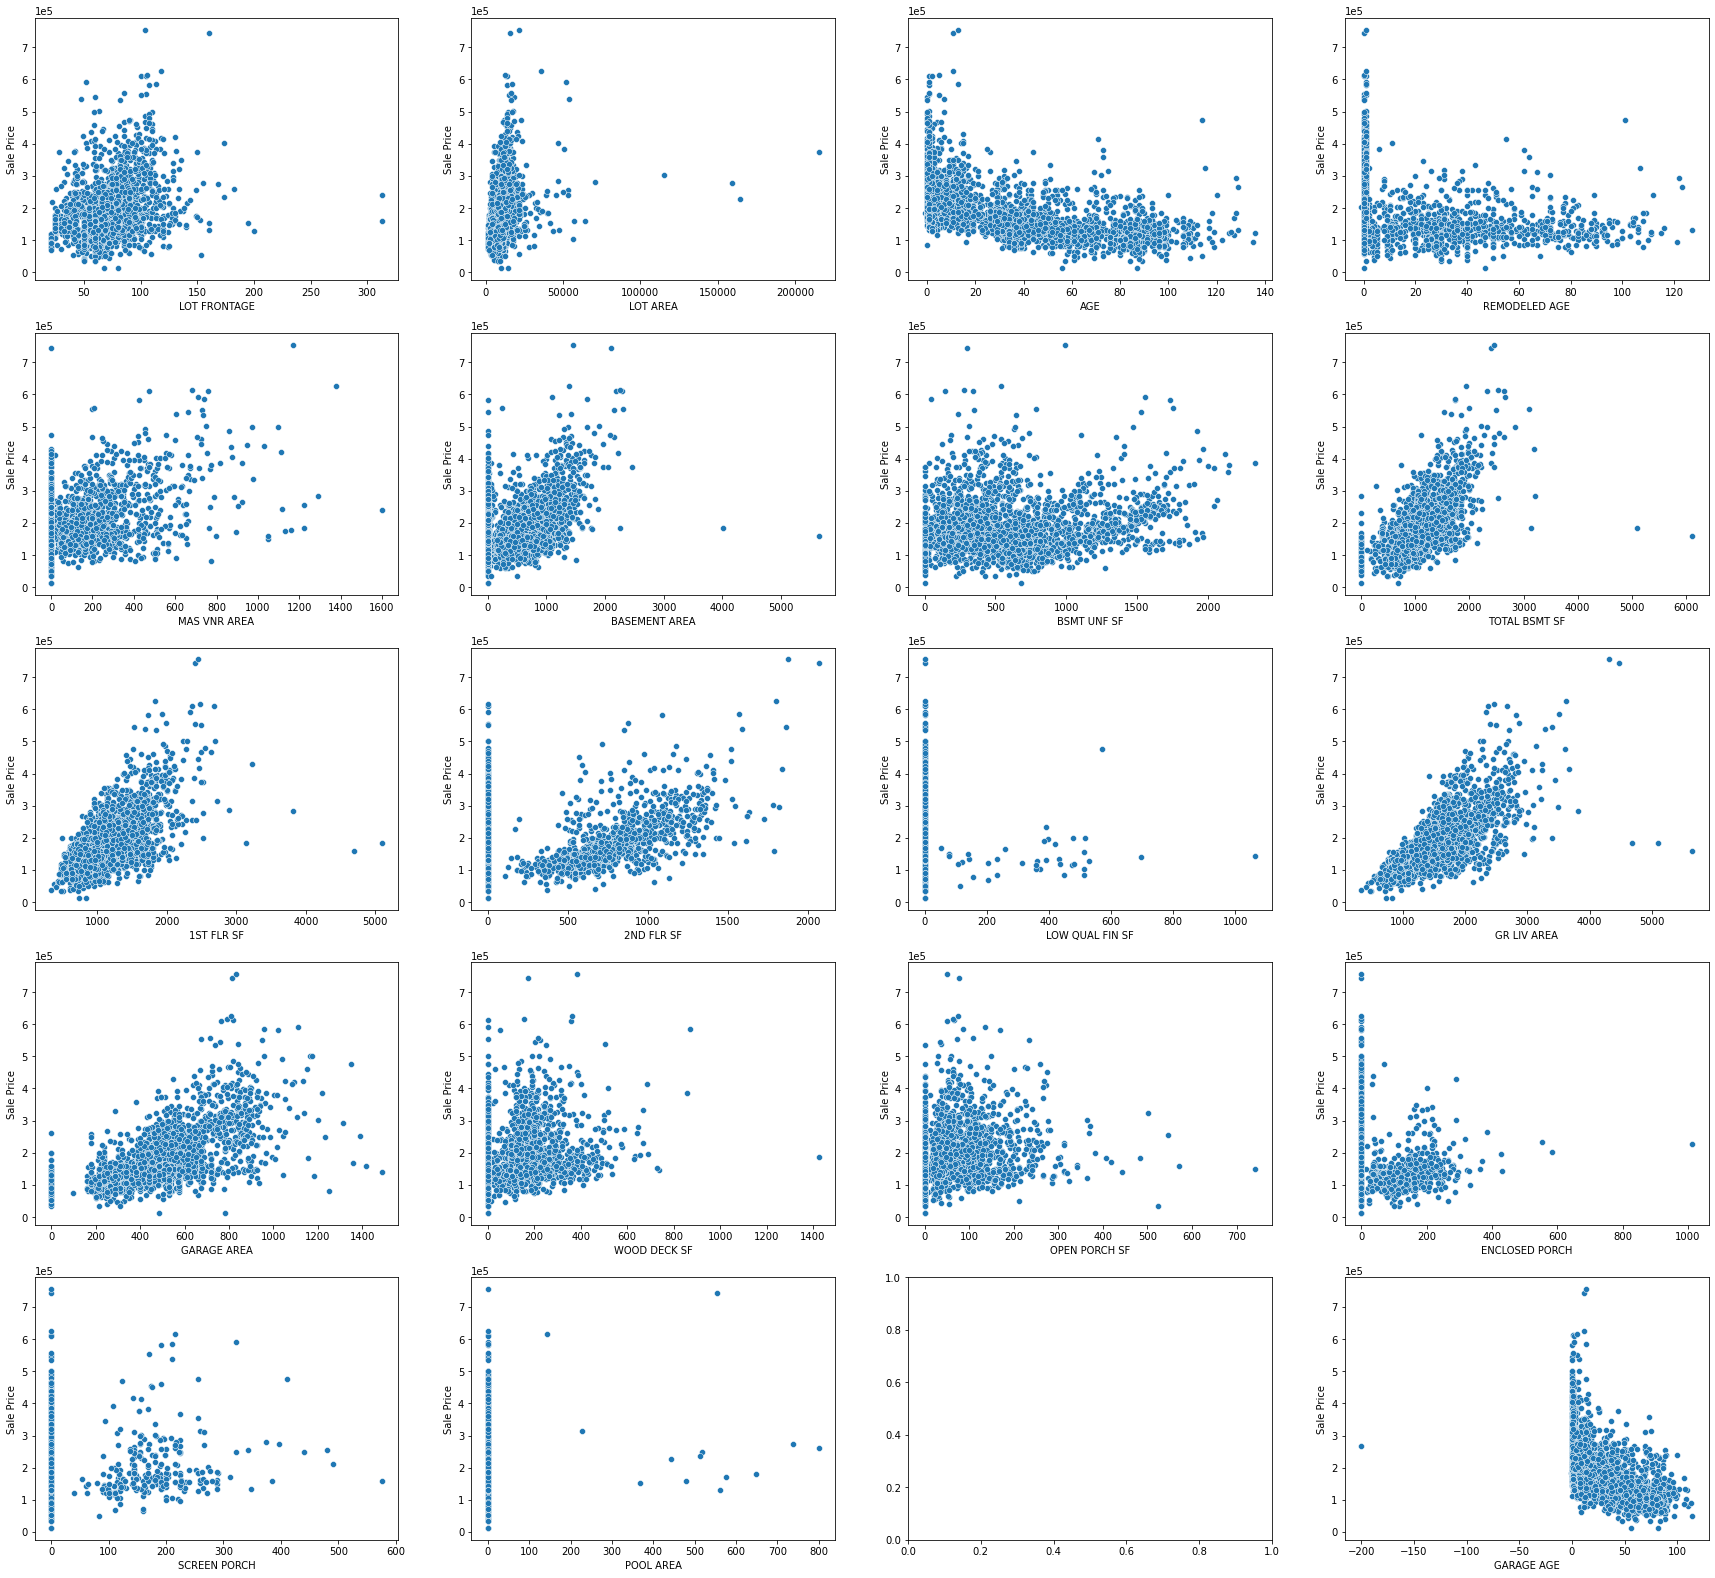

In [12]:
fig, ax = plt.subplots(5,4,figsize=(30,28))
for ind, ifeature in enumerate(Continous_features[0:20]):
    if (ifeature=='SalePrice'):
        continue
    df   = Ames.loc[:,[ifeature,'SalePrice']]
    icol = ind % 4
    irow = int(np.floor(ind/4))
    av = sns.scatterplot(data = df, x = ifeature, y = 'SalePrice', ax = ax[irow,icol])
    av.set(xlabel = ifeature.upper().replace('_',' '),ylabel='Sale Price')
    av.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

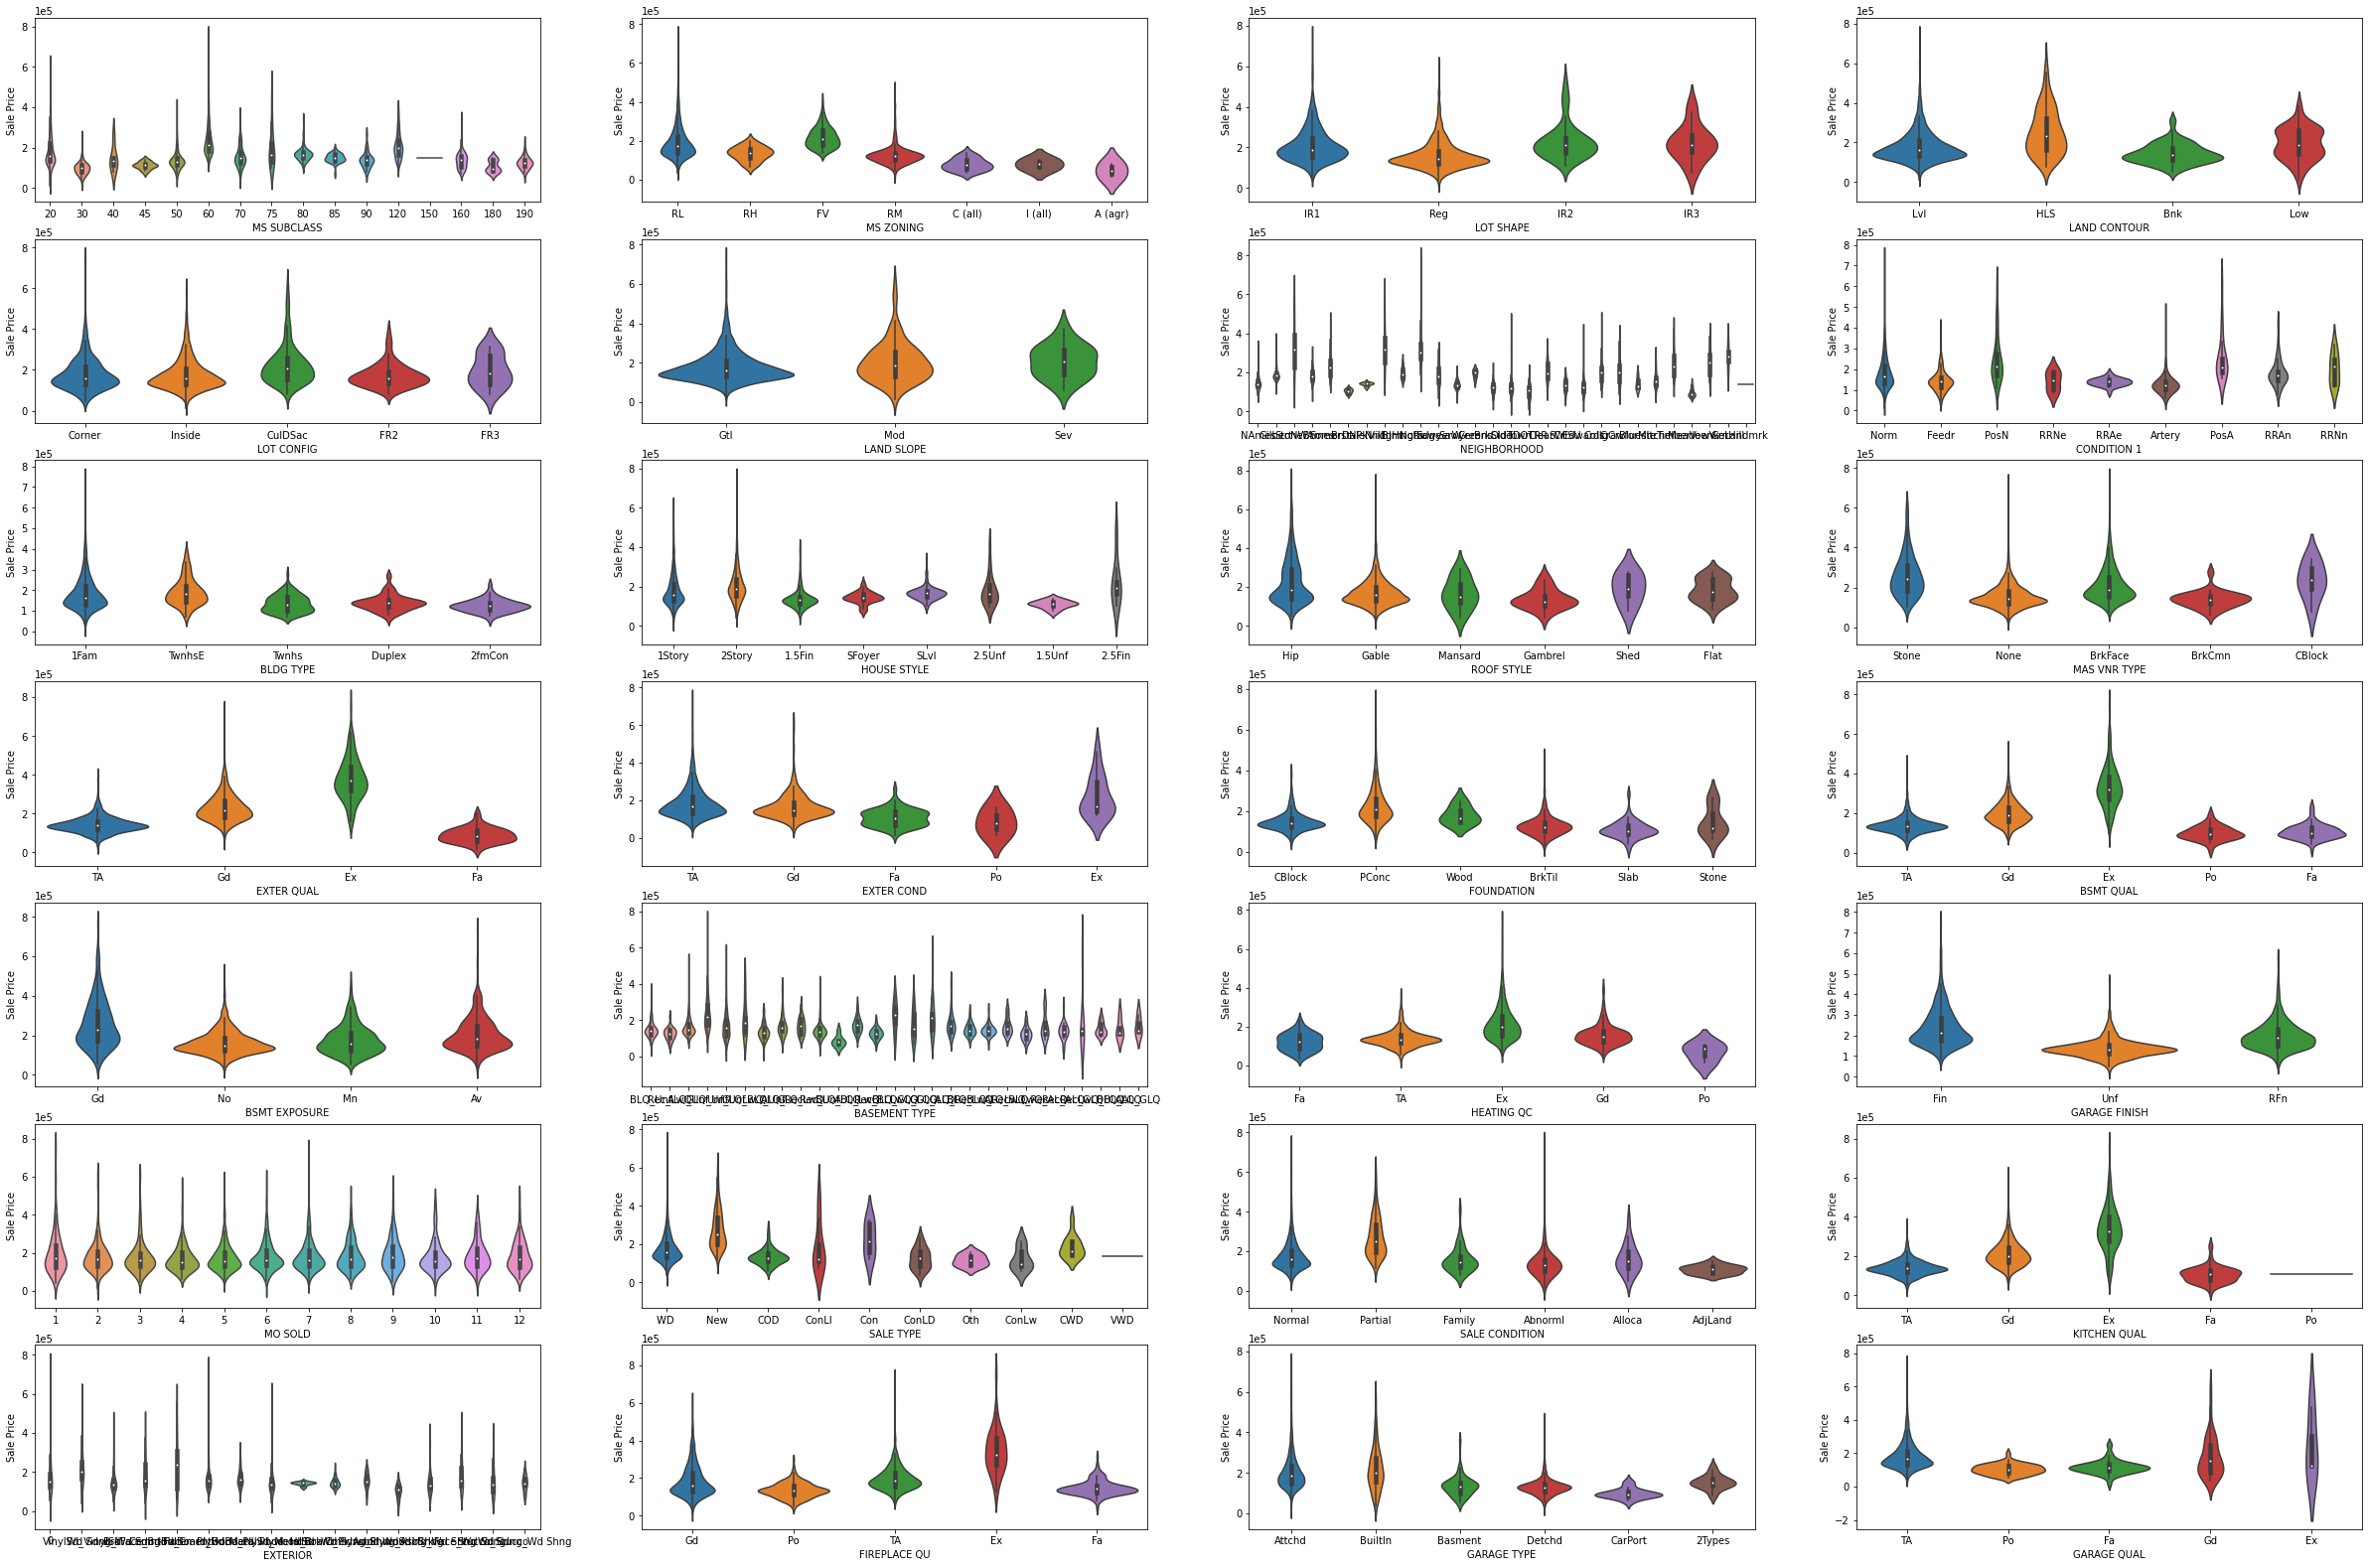

In [13]:
fig, ax = plt.subplots(7,4,figsize=(42,28))
for ind, ifeature in enumerate(categorical_features[0:28]):

    df   = Ames.loc[:,[ifeature,'SalePrice']]
    icol = ind % 4
    irow = int(np.floor(ind/4))
    
    av = sns.violinplot(data = df, x = ifeature, y = 'SalePrice', ax = ax[irow,icol])
    av.set(xlabel = ifeature.upper().replace('_',' '),ylabel='Sale Price')
    av.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

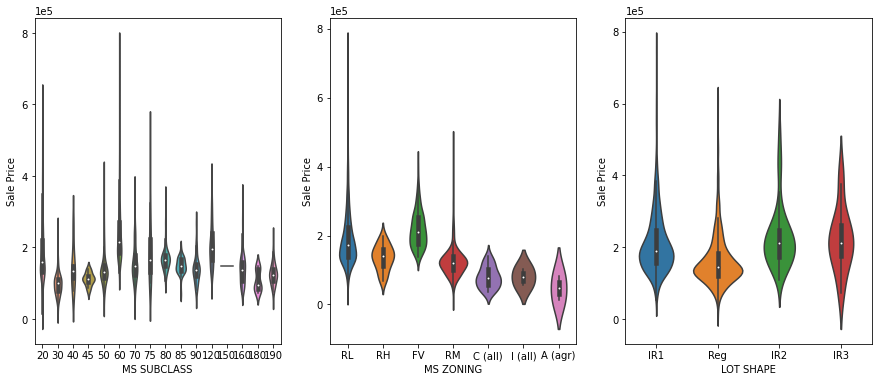

In [14]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
for ind, ifeature in enumerate(categorical_features[0:3]):

    df   = Ames.loc[:,[ifeature,'SalePrice']]
    icol = ind % 3
    
    av = sns.violinplot(data = df, x = ifeature, y = 'SalePrice', ax = ax[icol])
    av.set(xlabel = ifeature.upper().replace('_',' '),ylabel='Sale Price')
    av.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

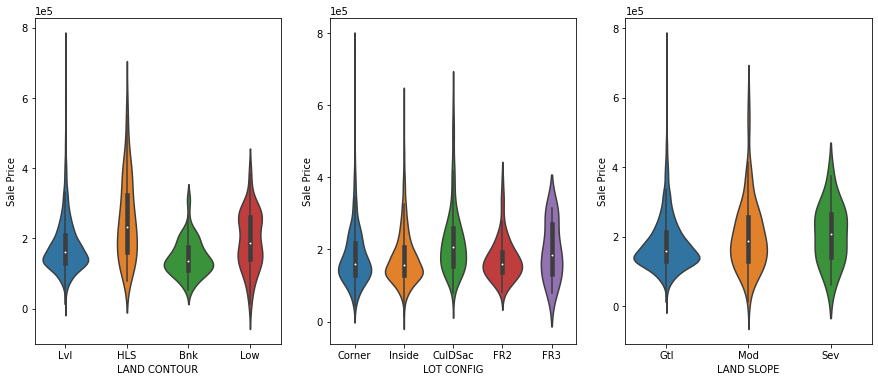

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
for ind, ifeature in enumerate(categorical_features[3:6]):

    df   = Ames.loc[:,[ifeature,'SalePrice']]
    icol = ind % 3
    
    av = sns.violinplot(data = df, x = ifeature, y = 'SalePrice', ax = ax[icol])
    av.set(xlabel = ifeature.upper().replace('_',' '),ylabel='Sale Price')
    av.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

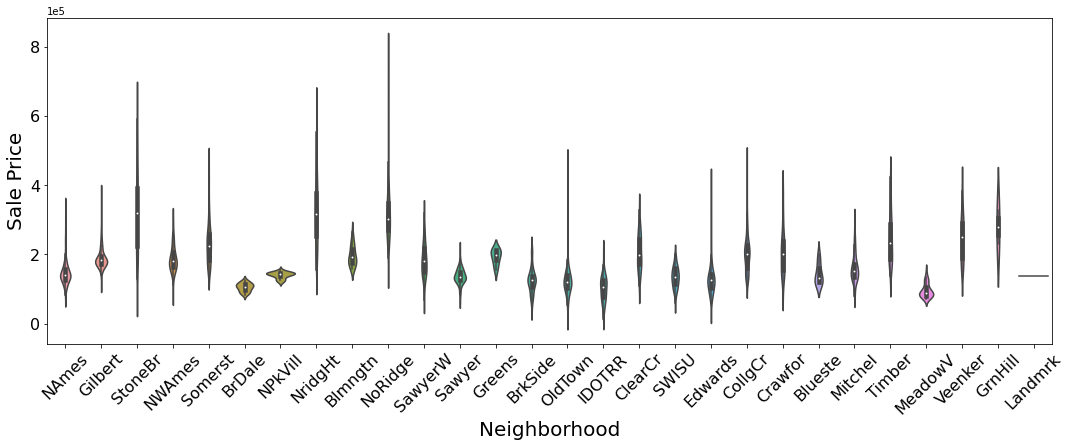

In [16]:
fig, ax = plt.subplots(1,1,figsize=(18,6))
for ind, ifeature in enumerate(categorical_features[6:7]):

    df   = Ames.loc[:,[ifeature,'SalePrice']]
    icol = ind % 3
    
    av = sns.violinplot(data = df, x = ifeature, y = 'SalePrice')
    av.set(xlabel = ifeature.upper().replace('_',' '),ylabel='Sale Price')
    av.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('Sale Price',fontsize=20)
    plt.xlabel('Neighborhood',fontsize=20)

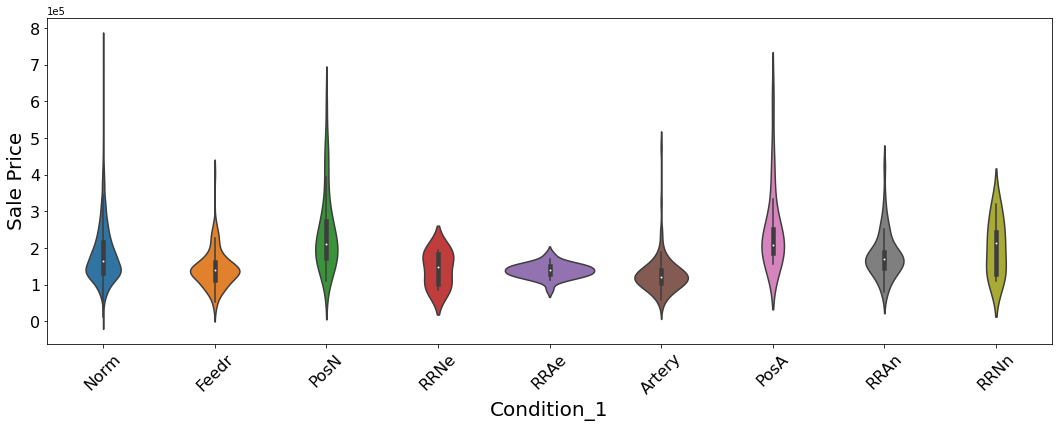

In [17]:
fig, ax = plt.subplots(1,1,figsize=(18,6))
for ind, ifeature in enumerate(categorical_features[7:8]):

    df   = Ames.loc[:,[ifeature,'SalePrice']]
    icol = ind % 3
    
    av = sns.violinplot(data = df, x = ifeature, y = 'SalePrice')
    av.set(xlabel = ifeature.upper().replace('_',' '),ylabel='Sale Price')
    av.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('Sale Price',fontsize=20)
    plt.xlabel(ifeature,fontsize=20)

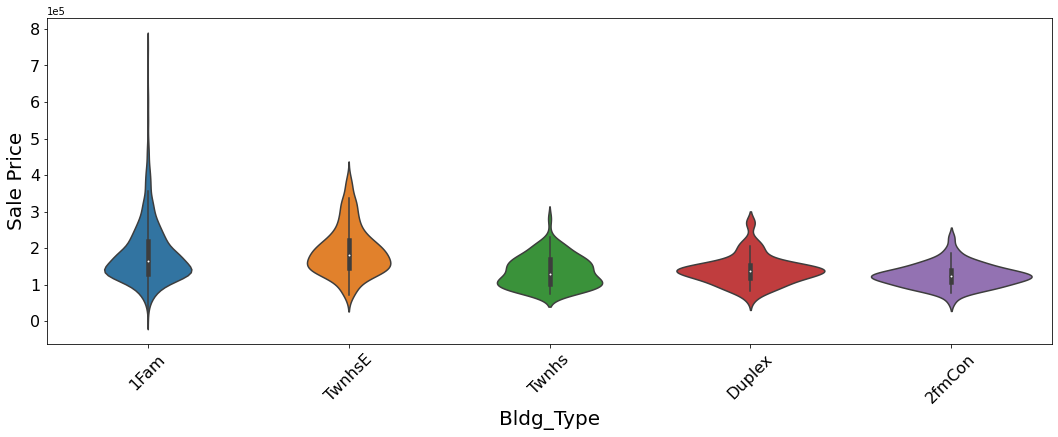

In [18]:
fig, ax = plt.subplots(1,1,figsize=(18,6))
for ind, ifeature in enumerate(categorical_features[8:9]):

    df   = Ames.loc[:,[ifeature,'SalePrice']]
    icol = ind % 3
    
    av = sns.violinplot(data = df, x = ifeature, y = 'SalePrice')
    av.set(xlabel = ifeature.upper().replace('_',' '),ylabel='Sale Price')
    av.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(rotation=45,fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('Sale Price',fontsize=20)
    plt.xlabel(ifeature,fontsize=20)

To do works : <br>
1. Feature  importance based on mutual info regression (univariate) for continous variables <br>
2. Feature  importance based on p-values for categorical variables <br>

In [19]:
import sklearn
from sklearn import model_selection, preprocessing, feature_selection, metrics
from sklearn import linear_model, ensemble, tree

In [20]:
MIR = sklearn.feature_selection.mutual_info_regression
selectKBest = sklearn.feature_selection.SelectKBest

In [21]:
#?MIR

In [22]:
MIR_features = list(Ordinal_featues + Continous_features)

In [23]:
len(Ordinal_featues)

11

In [24]:
len(Continous_features)

20

In [25]:
discrete_features  = [True for i in range(11)] + [False for i in range(20)]

In [26]:
X = Ames.loc[:,MIR_features].drop(['SalePrice'],axis=1)
Y = Ames.loc[:,'SalePrice']

In [27]:
#X.columns

In [28]:
MIRfun = selectKBest(score_func = MIR, k='all')

In [29]:
MIRfun.get_params()

{'k': 'all',
 'score_func': <function sklearn.feature_selection._mutual_info.mutual_info_regression(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>}

In [30]:
MIR_fit1 = MIRfun.fit(X,Y)

In [31]:
MIR_score = MIR_fit1.get_support()
MIR_score

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [32]:
MIR_fit1.scores_

array([0.5809744 , 0.12765789, 0.04633805, 0.01215916, 0.03559366,
       0.26381741, 0.05756354, 0.03697667, 0.19884446, 0.16289538,
       0.38773275, 0.22886819, 0.16482259, 0.36839041, 0.14030266,
       0.17599824, 0.16197974, 0.11677932, 0.39270428, 0.37239959,
       0.20747669, 0.01548755, 0.49759632, 0.41473261, 0.11184706,
       0.17911006, 0.04594452, 0.00705592, 0.00447699, 0.29456448])

In [33]:
d = ['Ordianl' for i in range(len(Ordinal_featues))]+['Continous' for i in range(len(Continous_features))]

In [34]:
MIR_result = zip(X.columns,MIR_fit1.scores_,d)
MIR_result = sorted(MIR_result,key=lambda x:x[1],reverse=True)
df = pd.DataFrame(data = MIR_result,columns=['Feature','Score','Feature Type'])

In [35]:
df['Score'] = df['Score'].astype('float64')

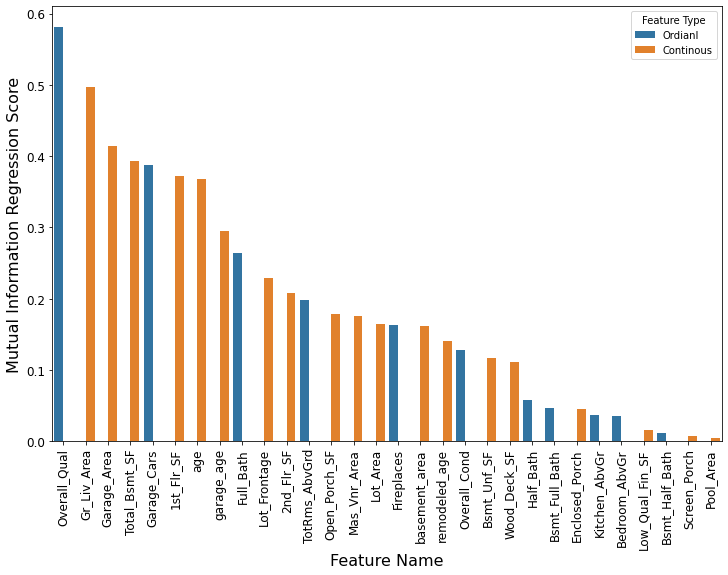

In [36]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
zv = sns.barplot(data = df , x = 'Feature', y = 'Score', hue = 'Feature Type', ax =ax)
zv.set_xlabel('Feature Name', fontsize=16)
zv.set_ylabel('Mutual Information Regression Score', fontsize=16)
plt.xticks(rotation = 90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

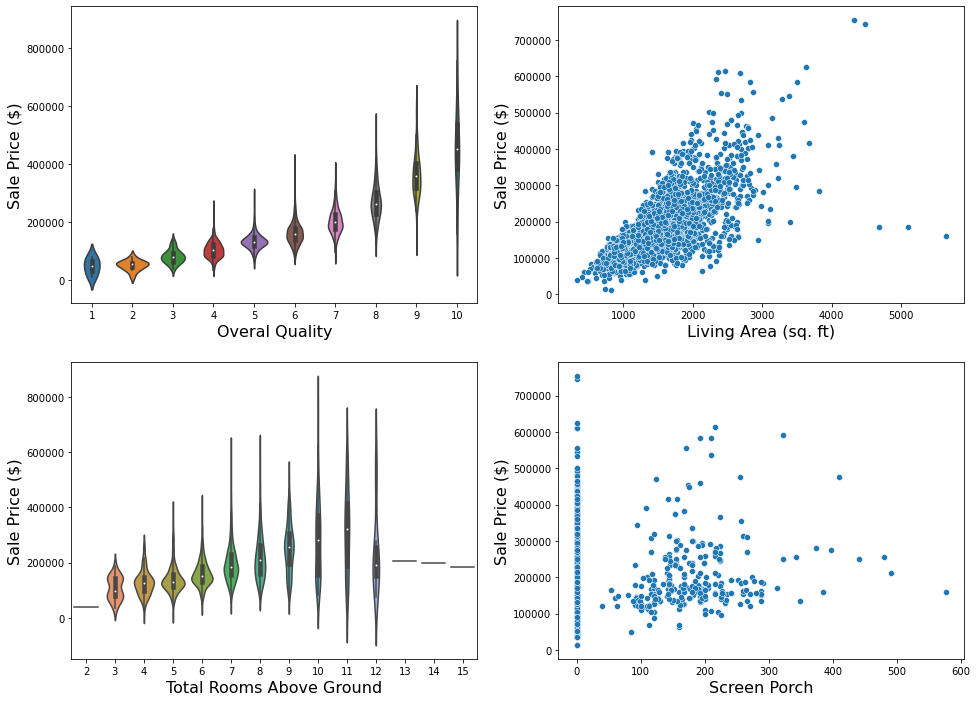

In [37]:
fig, axis = plt.subplots(2,2,figsize=(16,12))
av = sns.violinplot(data = Ames, x = 'Overall_Qual', y = 'SalePrice', ax=axis[0,0])
av.set_xlabel('Overal Quality', fontsize = 16)
av.set_ylabel('Sale Price ($)', fontsize = 16)
av = sns.scatterplot(data = Ames, x = 'Gr_Liv_Area', y = 'SalePrice', markers='O',ax=axis[0,1])
av.set_xlabel('Living Area (sq. ft)', fontsize = 16)
av.set_ylabel('Sale Price ($)', fontsize = 16)
av = sns.violinplot(data = Ames, x = 'TotRms_AbvGrd', y = 'SalePrice', ax=axis[1,0])
av.set_xlabel('Total Rooms Above Ground', fontsize = 16)
av.set_ylabel('Sale Price ($)', fontsize = 16)
av = sns.scatterplot(data = Ames, x = 'Screen_Porch', y = 'SalePrice', markers='O',ax=axis[1,1])
av.set_xlabel('Screen Porch', fontsize = 16)
av.set_ylabel('Sale Price ($)', fontsize = 16);

In [38]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as ss

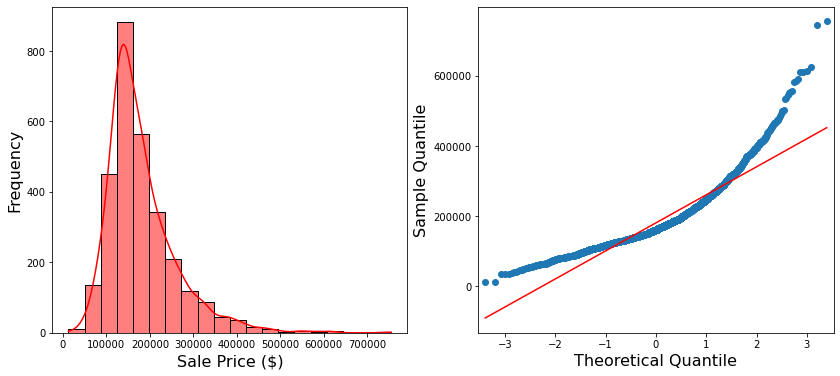

In [39]:
fig,axis = plt.subplots(1,2,figsize=(14,6))

av = sns.histplot(Ames['SalePrice'],bins = 20,kde = True,color = 'red', ax = axis[0])
av.set_xlabel('Sale Price ($)',fontsize=16)
av.set_ylabel('Frequency',fontsize=16)

av = qqplot(Ames['SalePrice'], line = 's' , ax = axis[1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize=16)
av.set_ylabel('Sample Quantile', fontsize=16)
plt.show()

In [40]:
from scipy import stats

In [41]:
fitted_data, fitted_lambda = stats.boxcox(Ames['SalePrice'].values)

In [42]:
fitted_lambda

0.007644244604190389

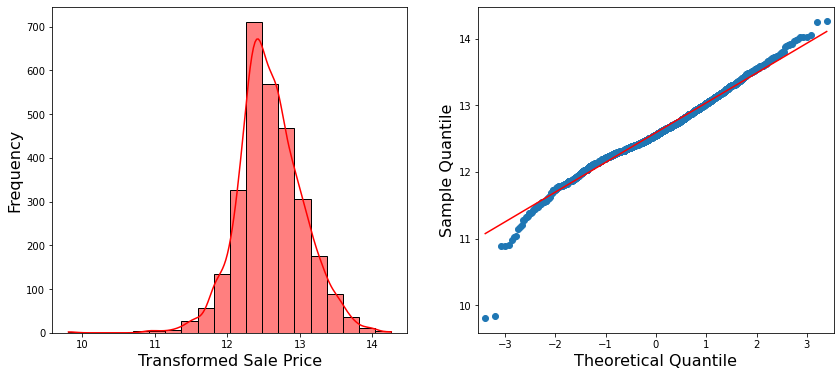

In [43]:
fig,axis = plt.subplots(1,2,figsize=(14,6))

av = sns.histplot(fitted_data,bins = 20,kde = True,color = 'red', ax = axis[0])
av.set_xlabel('Transformed Sale Price',fontsize=16)
av.set_ylabel('Frequency',fontsize=16)

av = qqplot(fitted_data, line = 's' , ax = axis[1]) 
av = av.gca()
av.set_xlabel('Theoretical Quantile', fontsize=16)
av.set_ylabel('Sample Quantile', fontsize=16)
plt.show()

In [44]:
Ames['TransSalePrice'] = fitted_data

In [45]:
len(categorical_features)

28

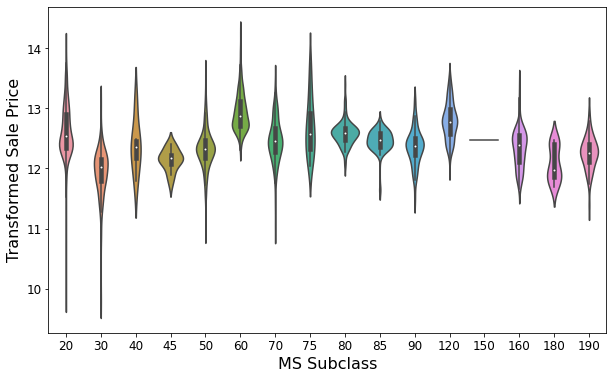

In [46]:
fig,axis = plt.subplots(1,1,figsize=(10,6))
av = sns.violinplot(x = Ames.MS_SubClass, y = fitted_data, ax = axis)
av.set_xlabel('MS Subclass', fontsize=16)
av.set_ylabel('Transformed Sale Price', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [47]:
cat_importance = {}

In [48]:
cat = Ames.MS_SubClass.value_counts()
cat = cat.index.values

a = Ames.loc[Ames['MS_SubClass']==cat[0],'TransSalePrice']
b = Ames.loc[Ames['MS_SubClass']==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames['MS_SubClass']==cat[2],'TransSalePrice']
d = Ames.loc[Ames['MS_SubClass']==cat[3],'TransSalePrice']
e = Ames.loc[Ames['MS_SubClass']==cat[4],'TransSalePrice']
f = Ames.loc[Ames['MS_SubClass']==cat[5],'TransSalePrice']
g = Ames.loc[Ames['MS_SubClass']==cat[6],'TransSalePrice']
h = Ames.loc[Ames['MS_SubClass']==cat[7],'TransSalePrice']
i = Ames.loc[Ames['MS_SubClass']==cat[8],'TransSalePrice']
j = Ames.loc[Ames['MS_SubClass']==cat[9],'TransSalePrice']
k = Ames.loc[Ames['MS_SubClass']==cat[10],'TransSalePrice']
l = Ames.loc[Ames['MS_SubClass']==cat[11],'TransSalePrice']
m = Ames.loc[Ames['MS_SubClass']==cat[12],'TransSalePrice']
n = Ames.loc[Ames['MS_SubClass']==cat[13],'TransSalePrice']
o = Ames.loc[Ames['MS_SubClass']==cat[14],'TransSalePrice']
p = Ames.loc[Ames['MS_SubClass']==cat[15],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p)
print(P_val)
cat_importance['MS_SubClass'] = P_val

LeveneResult(statistic=12.566697562926791, pvalue=5.7380356320420105e-31)
7.09160772737469e-218


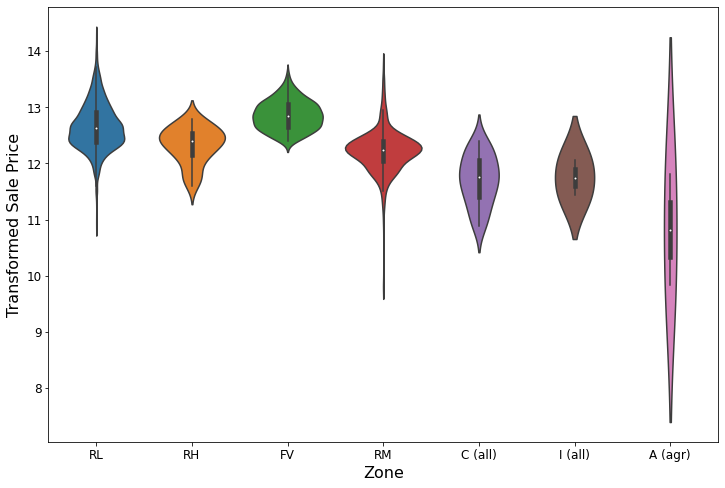

In [49]:
fig,axis = plt.subplots(1,1,figsize=(12,8))
av = sns.violinplot(x = Ames.MS_Zoning, y = fitted_data, ax = axis)
av.set_xlabel('Zone', fontsize=16)
av.set_ylabel('Transformed Sale Price', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [50]:
cat = Ames.MS_Zoning.value_counts()
cat = cat.index.values

feature = 'MS_Zoning'
a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,g,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=10.685787972008384, pvalue=8.873330596583335e-12)
8.497447415081129e-120


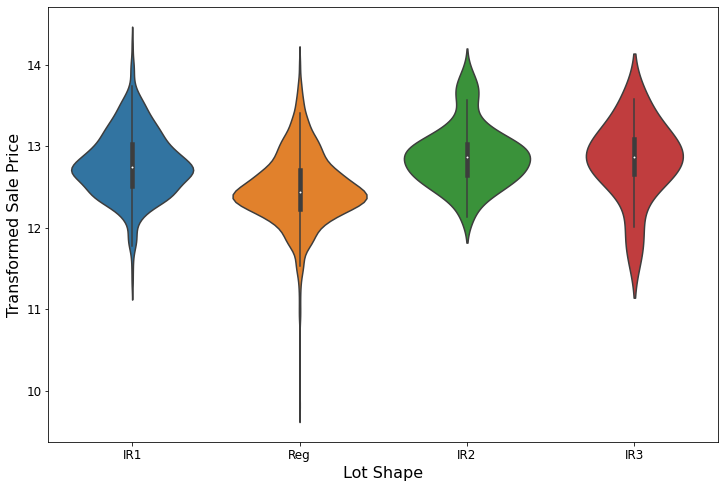

In [51]:
fig,axis = plt.subplots(1,1,figsize=(12,8))
av = sns.violinplot(x = Ames.Lot_Shape, y = fitted_data, ax = axis)
av.set_xlabel('Lot Shape', fontsize=16)
av.set_ylabel('Transformed Sale Price', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [52]:
cat = Ames.Lot_Shape.value_counts()
cat = cat.index.values

feature = 'Lot_Shape'
a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=0.5746036012252007, pvalue=0.6317003046649151)
2.5986978377661735e-79


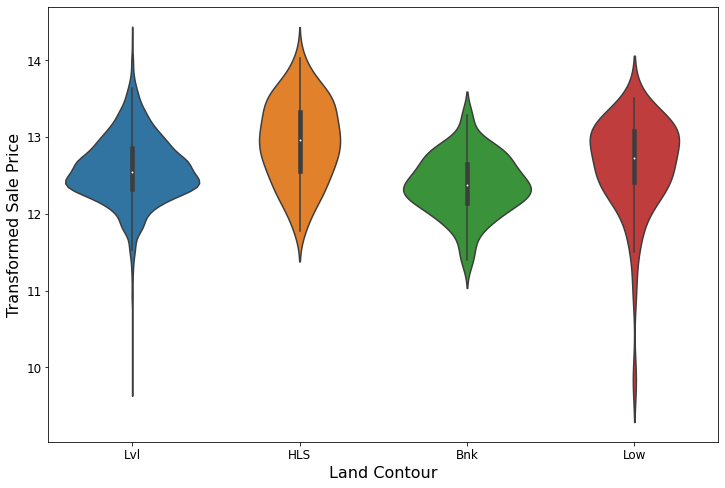

In [53]:
fig,axis = plt.subplots(1,1,figsize=(12,8))
av = sns.violinplot(x = Ames.Land_Contour, y = fitted_data, ax = axis)
av.set_xlabel('Land Contour', fontsize=16)
av.set_ylabel('Transformed Sale Price', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [54]:
cat = Ames.Land_Contour.value_counts()
cat = cat.index.values
feature = 'Land_Contour'
a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
print(scipy.stats.levene(a,b,c,d,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=8.496036524738981, pvalue=1.2845603931364453e-05)
1.0129101270702889e-18


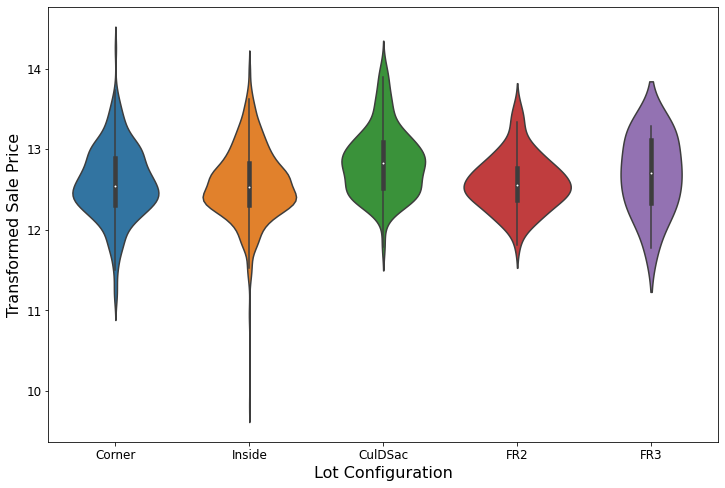

In [55]:
fig,axis = plt.subplots(1,1,figsize=(12,8))
av = sns.violinplot(x = Ames.Lot_Config, y = fitted_data, ax = axis)
av.set_xlabel('Lot Configuration', fontsize=16)
av.set_ylabel('Transformed Sale Price', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [56]:
cat = Ames.Lot_Config.value_counts()
cat = cat.index.values
feature = 'Lot_Config'
a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=2.0028438524400585, pvalue=0.09146257426606111)
1.3272452918151504e-12


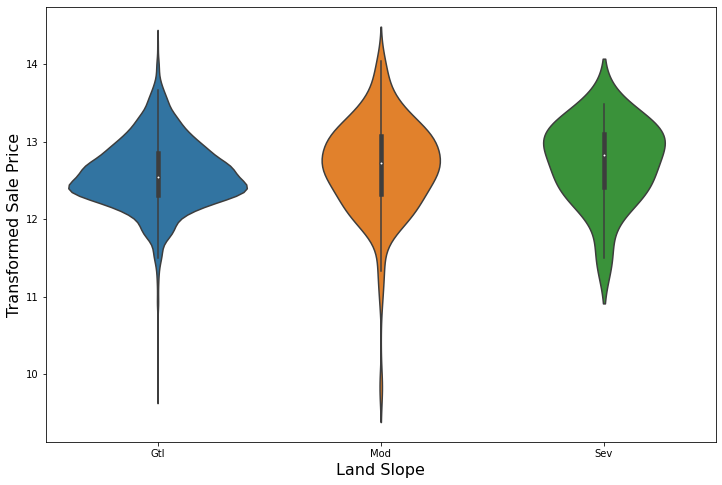

In [57]:
fig,axis = plt.subplots(1,1,figsize=(12,8))
av = sns.violinplot(x = Ames.Land_Slope, y = fitted_data, ax = axis)
av.set_xlabel('Land Slope', fontsize=16)
av.set_ylabel('Transformed Sale Price', fontsize=16);

In [58]:
cat = Ames.Land_Slope.value_counts()
cat = cat.index.values
feature = 'Land_Slope'
a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
print(scipy.stats.levene(a,b,c,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=7.688063719729938, pvalue=0.0004675797292527997)
0.005905127441193893


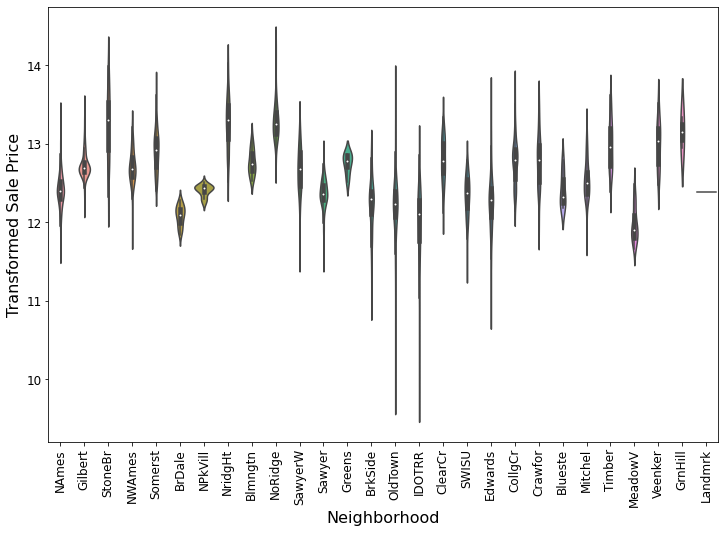

In [59]:
fig,axis = plt.subplots(1,1,figsize=(12,8))
av = sns.violinplot(x = Ames.Neighborhood, y = fitted_data, ax = axis)
av.set_xlabel('Neighborhood', fontsize=16)
av.set_ylabel('Transformed Sale Price', fontsize=16)
plt.xticks(rotation = 90,fontsize=12)
plt.yticks(fontsize=12);

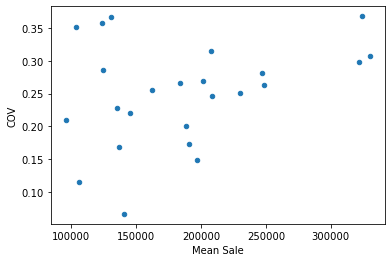

In [60]:
cat = Ames.Neighborhood.value_counts()
cat = cat.index.values
feature = 'Neighborhood'
df = Ames.groupby(['Neighborhood'])[['SalePrice']].agg(['mean','std','count']).reset_index()
df.columns = ['Neighborhood','Mean Sale','Std Sale','Count']
df.dropna(axis=0,how='any',inplace=True)
df.drop(axis=0,index = df.index.values[df['Count']<=10],inplace=True)
df.sort_values(by='Mean Sale',ascending=False,inplace=True)
df['COV'] = df['Std Sale']/df['Mean Sale']
df.plot(kind='scatter',x='Mean Sale',y='COV')
plt.show()

In [61]:
cat = Ames.Neighborhood.value_counts()
cat = cat.index.values
feature = 'Neighborhood'
a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']
h = Ames.loc[Ames[feature]==cat[7],'TransSalePrice']
i = Ames.loc[Ames[feature]==cat[8],'TransSalePrice']
j = Ames.loc[Ames[feature]==cat[9],'TransSalePrice']
k = Ames.loc[Ames[feature]==cat[10],'TransSalePrice']
l = Ames.loc[Ames[feature]==cat[11],'TransSalePrice']
m = Ames.loc[Ames[feature]==cat[12],'TransSalePrice']
n = Ames.loc[Ames[feature]==cat[13],'TransSalePrice']
o = Ames.loc[Ames[feature]==cat[14],'TransSalePrice']
p = Ames.loc[Ames[feature]==cat[15],'TransSalePrice']
q = Ames.loc[Ames[feature]==cat[16],'TransSalePrice']
r = Ames.loc[Ames[feature]==cat[17],'TransSalePrice']
s = Ames.loc[Ames[feature]==cat[18],'TransSalePrice']
t = Ames.loc[Ames[feature]==cat[19],'TransSalePrice']
u = Ames.loc[Ames[feature]==cat[20],'TransSalePrice']
v = Ames.loc[Ames[feature]==cat[21],'TransSalePrice']
x = Ames.loc[Ames[feature]==cat[22],'TransSalePrice']
y = Ames.loc[Ames[feature]==cat[23],'TransSalePrice']
z = Ames.loc[Ames[feature]==cat[24],'TransSalePrice']
w = Ames.loc[Ames[feature]==cat[25],'TransSalePrice']
aa = Ames.loc[Ames[feature]==cat[26],'TransSalePrice']
ab = Ames.loc[Ames[feature]==cat[27],'TransSalePrice']

In [62]:
print(scipy.stats.levene(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,w,aa,ab,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,w,aa,ab)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=9.995069420864343, pvalue=8.782063428634216e-40)
0.0


In [63]:
cat = Ames.Condition_1.value_counts()
cat = cat.index.values
feature = 'Condition_1'

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']
h = Ames.loc[Ames[feature]==cat[7],'TransSalePrice'] 
i = Ames.loc[Ames[feature]==cat[8],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,g,h,i,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h,i)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=5.175430284073208, pvalue=1.9500632895938848e-06)
1.0631375794377765e-32


In [64]:
cat = Ames.Bldg_Type.value_counts()
cat = cat.index.values
feature = 'Bldg_Type'

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=11.52661236098101, pvalue=2.7597249684241416e-09)
7.147463897971463e-31


In [65]:
feature = 'House_Style'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']
h = Ames.loc[Ames[feature]==cat[7],'TransSalePrice'] 

print(scipy.stats.levene(a,b,c,d,e,f,g,h,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=19.199874577966227, pvalue=3.036683832650387e-25)
9.181428160823308e-68


In [66]:
feature = 'Roof_Style'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=22.622624544094794, pvalue=2.473746450439131e-22)
5.5172727948265414e-21


In [67]:
feature = 'Mas_Vnr_Type'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=3.219813826883637, pvalue=0.012004510983158342)
3.3054920875766297e-121


In [68]:
feature = 'Exter_Qual'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=6.810383448029392, pvalue=0.00014269306394851852)
4.6063624422923827e-300


In [69]:
feature = 'Exter_Cond'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=9.20562391518201, pvalue=2.172250163762021e-07)
3.150648541011879e-20


In [70]:
feature = 'Foundation'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=13.191191925415971, pvalue=9.915150036874316e-13)
2.925640996290883e-227


In [71]:
feature = 'Bsmt_Qual'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=6.170370686916621, pvalue=6.092213847343485e-05)
8.001069743078107e-294


In [72]:
feature = 'Bsmt_Exposure'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=16.981454623712278, pvalue=6.207330298332021e-11)
1.62380020766873e-63


In [73]:
feature = 'basement_type'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']
h = Ames.loc[Ames[feature]==cat[7],'TransSalePrice']
i = Ames.loc[Ames[feature]==cat[8],'TransSalePrice']
j = Ames.loc[Ames[feature]==cat[9],'TransSalePrice']
k = Ames.loc[Ames[feature]==cat[10],'TransSalePrice']
l = Ames.loc[Ames[feature]==cat[11],'TransSalePrice']
m = Ames.loc[Ames[feature]==cat[12],'TransSalePrice']
n = Ames.loc[Ames[feature]==cat[13],'TransSalePrice']
o = Ames.loc[Ames[feature]==cat[14],'TransSalePrice']
p = Ames.loc[Ames[feature]==cat[15],'TransSalePrice']
q = Ames.loc[Ames[feature]==cat[16],'TransSalePrice']
r = Ames.loc[Ames[feature]==cat[17],'TransSalePrice']
s = Ames.loc[Ames[feature]==cat[18],'TransSalePrice']
t = Ames.loc[Ames[feature]==cat[19],'TransSalePrice']
u = Ames.loc[Ames[feature]==cat[20],'TransSalePrice']
v = Ames.loc[Ames[feature]==cat[21],'TransSalePrice']
x = Ames.loc[Ames[feature]==cat[22],'TransSalePrice']
y = Ames.loc[Ames[feature]==cat[23],'TransSalePrice']
z = Ames.loc[Ames[feature]==cat[24],'TransSalePrice']
w = Ames.loc[Ames[feature]==cat[25],'TransSalePrice']
aa = Ames.loc[Ames[feature]==cat[26],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,w,aa,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,x,y,z,w,aa)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=7.080422668626208, pvalue=7.795369001823489e-25)
1.3074818212531804e-138


In [74]:
feature = 'Heating_QC'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice'] 

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=22.518911793947918, pvalue=2.4304235139155945e-18)
2.015911934803459e-168


In [75]:
feature = 'Garage_Finish'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice'] 
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']

print(scipy.stats.levene(a,b,c,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=18.89958281933913, pvalue=6.991371197468384e-09)
1.047296631646706e-229


In [76]:
feature = 'Mo_Sold'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']
h = Ames.loc[Ames[feature]==cat[7],'TransSalePrice']
i = Ames.loc[Ames[feature]==cat[8],'TransSalePrice']
j = Ames.loc[Ames[feature]==cat[9],'TransSalePrice']
k = Ames.loc[Ames[feature]==cat[10],'TransSalePrice']
l = Ames.loc[Ames[feature]==cat[11],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,g,h,i,j,k,l,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h,i,j,k,l)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=2.319648931050238, pvalue=0.007844200830462186)
0.10302892195654977


In [77]:
feature = 'Sale_Type'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']
h = Ames.loc[Ames[feature]==cat[7],'TransSalePrice']
i = Ames.loc[Ames[feature]==cat[8],'TransSalePrice']
j = Ames.loc[Ames[feature]==cat[9],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,g,h,i,j,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h,i,j)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=2.4588412209048465, pvalue=0.008651908714473968)
4.26673499720936e-70


In [78]:
feature = 'Sale_Condition'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=2.8363614750403023, pvalue=0.01465555951923551)
1.9594965468877138e-76


In [79]:
feature = 'Kitchen_Qual'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values
len(cat)

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=10.161597908162278, pvalue=3.611215059911842e-08)
1.3140197688425557e-282


In [80]:
feature = 'exterior'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']
g = Ames.loc[Ames[feature]==cat[6],'TransSalePrice']
h = Ames.loc[Ames[feature]==cat[7],'TransSalePrice']
i = Ames.loc[Ames[feature]==cat[8],'TransSalePrice']
j = Ames.loc[Ames[feature]==cat[9],'TransSalePrice']
k = Ames.loc[Ames[feature]==cat[10],'TransSalePrice']
l = Ames.loc[Ames[feature]==cat[11],'TransSalePrice']
m = Ames.loc[Ames[feature]==cat[12],'TransSalePrice']
n = Ames.loc[Ames[feature]==cat[13],'TransSalePrice']
o = Ames.loc[Ames[feature]==cat[14],'TransSalePrice']
p = Ames.loc[Ames[feature]==cat[15],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=14.977333943305146, pvalue=7.659008218587297e-38)
9.757737107071148e-124


In [81]:
feature = 'Fireplace_Qu'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=48.79540668396609, pvalue=8.65155826909119e-40)
3.1258872073703395e-89


In [82]:
feature = 'Garage_Type'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values
len(cat)

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']
f = Ames.loc[Ames[feature]==cat[5],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,f,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e,f)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=28.032940460102342, pvalue=7.846954959396045e-28)
1.4606032081786859e-179


In [83]:
feature = 'Garage_Qual'
cat = Ames.loc[:,feature].value_counts()
cat = cat.index.values
len(cat)

a = Ames.loc[Ames[feature]==cat[0],'TransSalePrice']
b = Ames.loc[Ames[feature]==cat[1],'TransSalePrice']
c = Ames.loc[Ames[feature]==cat[2],'TransSalePrice']
d = Ames.loc[Ames[feature]==cat[3],'TransSalePrice']
e = Ames.loc[Ames[feature]==cat[4],'TransSalePrice']

print(scipy.stats.levene(a,b,c,d,e,center = 'mean'))
H, P_val = scipy.stats.kruskal(a,b,c,d,e)
print(P_val)
cat_importance[feature] = P_val

LeveneResult(statistic=12.169069852051223, pvalue=8.202722502864429e-10)
1.8518122813264384e-44


In [84]:
#cat_importance

In [85]:
df = pd.DataFrame(data = cat_importance.values(), index = cat_importance.keys())
df.columns = ['Score']
df.sort_values(by='Score',ascending=True,inplace=True)
df['Ranking'] = np.arange(df.shape[0],0,-1)
df

,Score,Ranking
Neighborhood,0.000000e+00,28
Exter_Qual,4.606362e-300,27
Bsmt_Qual,8.001070e-294,26
Kitchen_Qual,1.314020e-282,25
Garage_Finish,1.047297e-229,24
Foundation,2.925641e-227,23
MS_SubClass,7.091608e-218,22
Garage_Type,1.460603e-179,21
Heating_QC,2.015912e-168,20
basement_type,1.307482e-138,19


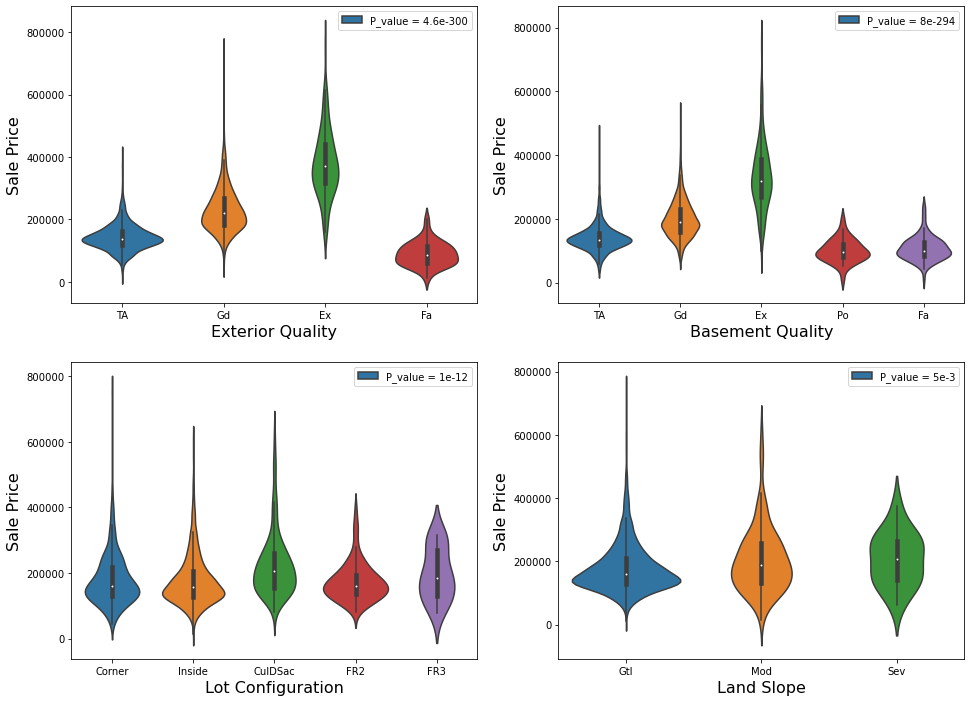

In [86]:
fig, axis = plt.subplots(2,2,figsize=(16,12))

s = ['P_value = ' + '4.6e-300']
av = sns.violinplot(data = Ames, x = 'Exter_Qual', y = 'SalePrice', ax = axis[0,0], label = s)
av.set_xlabel('Exterior Quality', fontsize = 16)
av.set_ylabel('Sale Price', fontsize = 16)
axis[0,0].legend(labels = s)

s = ['P_value = ' + '8e-294']
av = sns.violinplot(data = Ames, x = 'Bsmt_Qual', y = 'SalePrice',ax=axis[0,1])
av.set_xlabel('Basement Quality', fontsize = 16)
av.set_ylabel('Sale Price', fontsize = 16)
axis[0,1].legend(labels = s)

s = ['P_value = ' + '1e-12']
av = sns.violinplot(data = Ames, x = 'Lot_Config', y = 'SalePrice', ax=axis[1,0])
av.set_xlabel('Lot Configuration', fontsize = 16)
av.set_ylabel('Sale Price', fontsize = 16)
axis[1,0].legend(labels = s)

s = ['P_value = ' + '5e-3']
av = sns.violinplot(data = Ames, x = 'Land_Slope', y = 'SalePrice',ax=axis[1,1])
av.set_xlabel('Land Slope', fontsize = 16)
av.set_ylabel('Sale Price', fontsize = 16);
axis[1,1].legend(labels = s);

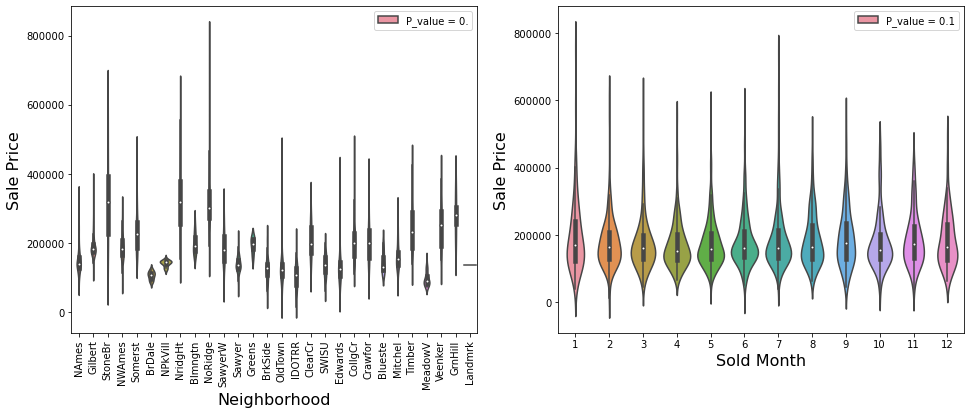

In [87]:
fig, axis = plt.subplots(1,2,figsize=(16,6))

s = ['P_value = ' + '0.']
av = sns.violinplot(data = Ames, x = 'Neighborhood', y = 'SalePrice', ax = axis[0], label = s)
av.set_xlabel('Neighborhood', fontsize = 16)
av.set_ylabel('Sale Price', fontsize = 16)
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 90)
axis[0].legend(labels = s)

s = ['P_value = ' + '0.1']
av = sns.violinplot(data = Ames, x = 'Mo_Sold', y = 'SalePrice', ax = axis[1], label = s)
av.set_xlabel('Sold Month', fontsize = 16)
av.set_ylabel('Sale Price', fontsize = 16)
axis[1].legend(labels = s);

In [88]:
from sklearn.decomposition import PCA

In [89]:
Ames.drop(['TransSalePrice'],axis=1,inplace=True)
Ames.drop(['SalePrice'],axis=1,inplace=True)

AmesPCA= Ames.drop(categorical_features,axis=1)
AmesPCAData = AmesPCA.values
AmesPCACol = AmesPCA.columns

for ifeature in categorical_features:
    
    temp_df = pd.get_dummies(Ames.loc[:,ifeature],prefix=ifeature,prefix_sep='_')
    AmesPCACol = list(AmesPCACol) + list(temp_df.columns)
    temp_data = temp_df.values
    AmesPCAData = np.hstack([AmesPCAData,temp_data])
    
AmesPCADum = pd.DataFrame(AmesPCAData, columns = AmesPCACol)

In [90]:
print(Ames.shape)
print(AmesPCADum.shape)

(2930, 58)
(2930, 254)


In [91]:
pca = sklearn.decomposition.PCA()
PCA_data = pca.fit_transform(AmesPCADum)

In [92]:
print(type(PCA_data))
print(PCA_data.shape)

<class 'numpy.ndarray'>
(2930, 254)


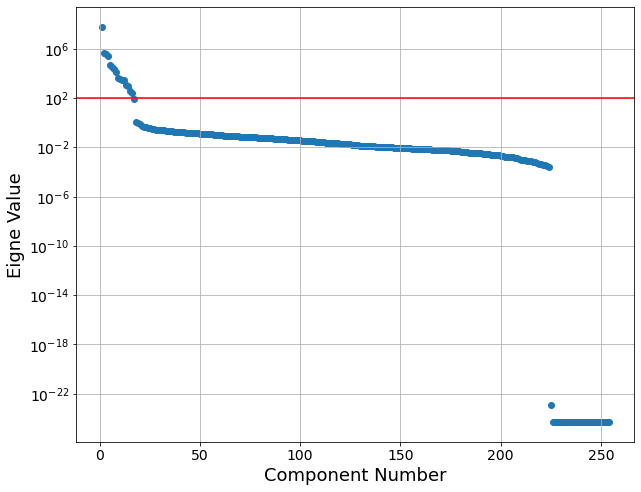

In [93]:
fig,axis = plt.subplots(1,1,figsize=(10,8))
plt.scatter(np.arange(1,255),pca.explained_variance_)
plt.xlabel('Component Number', fontsize = 18)
plt.ylabel('Eigne Value', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log") 

ax = plt.axhline(y=100,color='red')

plt.grid()
plt.show()

In [94]:
pca.explained_variance_[pca.explained_variance_>100].shape

(16,)

In [95]:
number = 120
pca = sklearn.decomposition.PCA(n_components = number)
PCA_data = pca.fit_transform(AmesPCADum)
df = pd.DataFrame(data = PCA_data, columns = ['feature_'+str(i) for i in range(number)])
df.head(3)
df.to_csv('PCAData.csv')

In [96]:
pca_feature_lambda = pd.DataFrame(data = np.round(np.abs(pca.components_.T),3), index = AmesPCACol)
pca_feature_lambda['Feature'] = pca_feature_lambda.index.values
pca_feature_lambda = pca_feature_lambda.reset_index()
pca_feature_lambda

,index,0,1,2,3,4,5,6,7,8,...,111,112,113,114,115,116,117,118,119,Feature
0,Lot_Frontage,0.001,0.011,0.001,0.000,0.015,0.011,0.006,0.006,0.014,...,0.000,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,Lot_Frontage
1,Lot_Area,0.999,0.032,0.003,0.004,0.004,0.000,0.001,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lot_Area
2,Overall_Qual,0.000,0.001,0.000,0.000,0.001,0.002,0.000,0.001,0.002,...,0.000,0.019,0.013,0.010,0.012,0.007,0.017,0.017,0.004,Overall_Qual
3,Overall_Cond,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.001,...,0.006,0.005,0.011,0.001,0.016,0.007,0.002,0.011,0.005,Overall_Cond
4,Mas_Vnr_Area,0.003,0.126,0.002,0.030,0.013,0.371,0.918,0.003,0.035,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Mas_Vnr_Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Garage_Qual_Ex,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.004,0.002,0.004,0.001,0.003,0.002,0.002,0.002,0.003,Garage_Qual_Ex
250,Garage_Qual_Fa,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.070,0.061,0.154,0.016,0.097,0.191,0.021,0.078,0.006,Garage_Qual_Fa
251,Garage_Qual_Gd,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.013,0.052,0.095,0.009,0.070,0.088,0.011,0.032,0.054,Garage_Qual_Gd
252,Garage_Qual_Po,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.066,0.024,0.102,0.025,0.081,0.189,0.036,0.144,0.071,Garage_Qual_Po


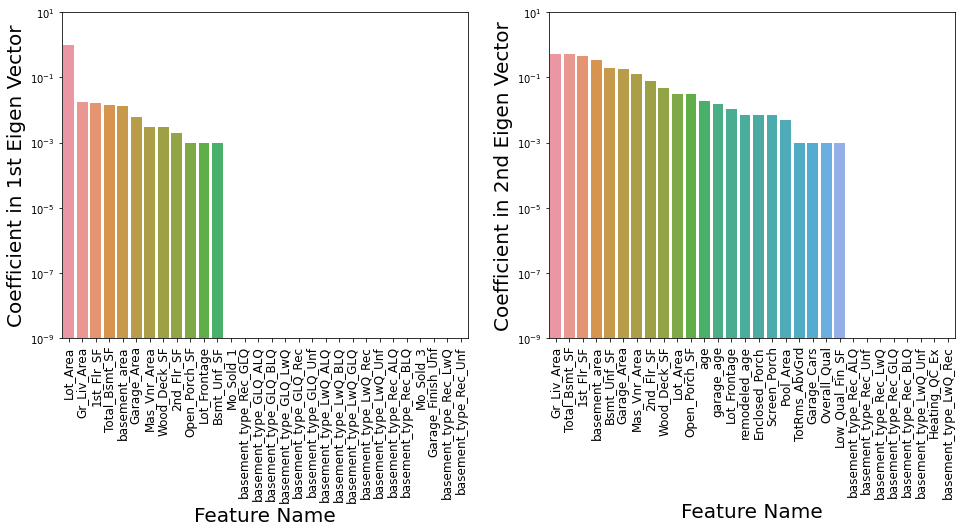

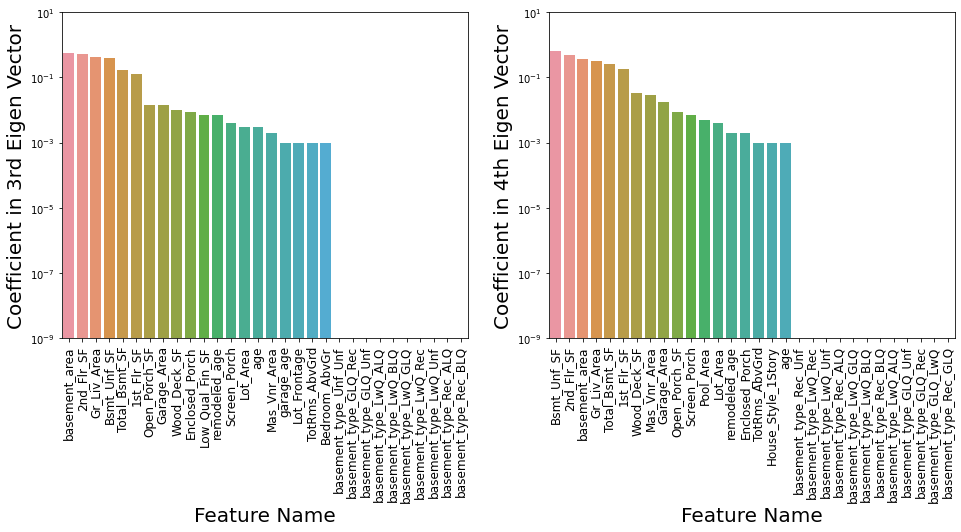

In [99]:
fig, axis = plt.subplots(1,2,figsize=(16,6))

df = pca_feature_lambda.iloc[:,[0,1]].sort_values(by=0,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x ='index', y = 0, ax = axis[0])
axis[0].set_xlabel('Feature Name',fontsize=20)
axis[0].set_ylabel('Coefficient in 1st Eigen Vector',fontsize=20)
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 90, size=12)
axis[0].set_yscale("log")
axis[0].set_ylim([1e-9,10])

df = pca_feature_lambda.iloc[:,[0,2]].sort_values(by=1,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x ='index', y = 1, ax = axis[1])
axis[1].set_xlabel('Feature Name',fontsize=20)
axis[1].set_ylabel('Coefficient in 2nd Eigen Vector',fontsize=20)
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 90, size=12)
axis[1].set_yscale("log")
axis[1].set_ylim([1e-9,10])

fig, axis = plt.subplots(1,2,figsize=(16,6))

df = pca_feature_lambda.iloc[:,[0,3]].sort_values(by=2,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x ='index', y = 2, ax = axis[0])
axis[0].set_xlabel('Feature Name',fontsize=20)
axis[0].set_ylabel('Coefficient in 3rd Eigen Vector',fontsize=20)
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 90, size=12)
axis[0].set_yscale("log")
axis[0].set_ylim([1e-9,10])

df = pca_feature_lambda.iloc[:,[0,4]].sort_values(by=3,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x ='index', y = 3, ax = axis[1])
axis[1].set_xlabel('Feature Name',fontsize=20)
axis[1].set_ylabel('Coefficient in 4th Eigen Vector',fontsize=20)
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 90, size=12)
axis[1].set_yscale("log")
axis[1].set_ylim([1e-9,10]);

In [98]:
from sklearn import random_projection

In [100]:
transformer = random_projection.GaussianRandomProjection()

In [101]:
transformer.get_params()

{'eps': 0.1, 'n_components': 'auto', 'random_state': None}

In [102]:
transformer.set_params(eps = 0.99, random_state = 144)
guassian_data = transformer.fit_transform(AmesPCADum)
guassian_data.shape

(2930, 191)

In [103]:
pd.DataFrame(data = guassian_data, columns = ['feature_'+str(i) for i in range(guassian_data.shape[1])]).to_csv('GausianData.csv')

In [104]:
transformer = random_projection.SparseRandomProjection(eps = 0.95)
guassian_data_sparse = transformer.fit_transform(AmesPCADum.values)
guassian_data_sparse.shape

(2930, 192)

In [105]:
pd.DataFrame(data = guassian_data_sparse, 
             columns = ['feature_'+str(i) for i in range(guassian_data_sparse.shape[1])]).to_csv('GausianDataSparse.csv')

In [106]:
from sklearn.decomposition import FastICA

In [107]:
number  = 80
transformer = FastICA(n_components = number, random_state = 144, whiten='unit-variance')

In [108]:
ICA_data = transformer.fit_transform(AmesPCADum.values)
pd.DataFrame(data = ICA_data, columns = ['feature_'+str(i) for i in range(number)]).to_csv('ICAData.csv')
ICA_data.shape

(2930, 80)

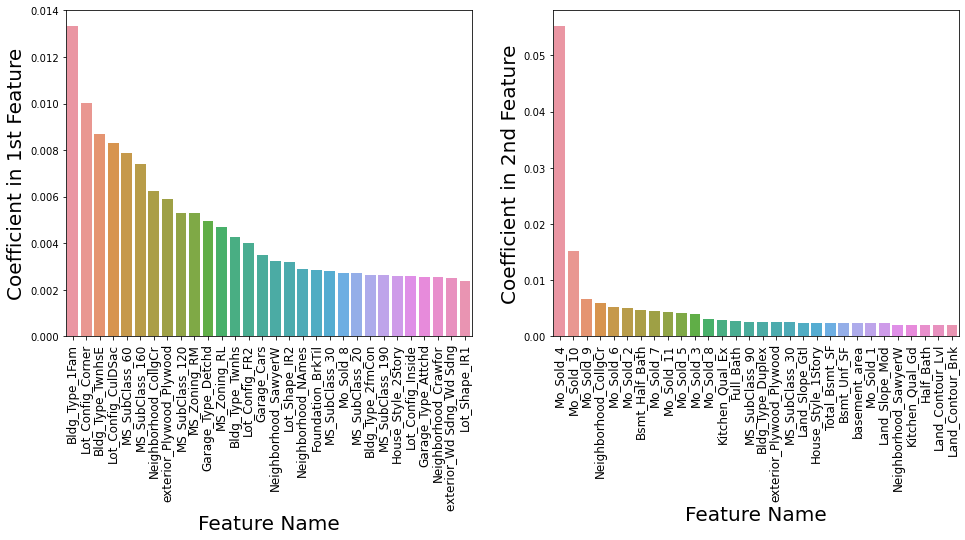

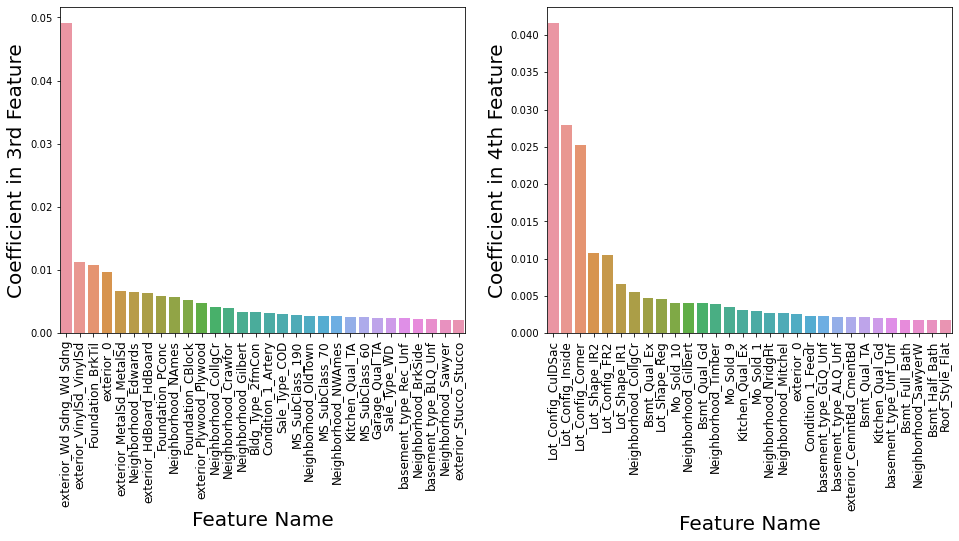

In [109]:
fig, axis = plt.subplots(1,2,figsize=(16,6))
#***********************************************************************************************************
df = pd.DataFrame(data = np.abs(transformer.components_[0,:].T),index=AmesPCADum.columns).reset_index().\
                  sort_values(by=0,ascending=False)
av = sns.barplot(data = df.iloc[:30,:] , x = 'index', y = 0, ax = axis[0])
axis[0].set_xlabel('Feature Name',fontsize=20)
axis[0].set_ylabel('Coefficient in 1st Feature',fontsize=20)
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 90, size=12)
#***********************************************************************************************************
df = pd.DataFrame(data = np.abs(transformer.components_[1,:].T),index=AmesPCADum.columns).reset_index().\
                  sort_values(by=0,ascending=False).reset_index()
av = sns.barplot(data = df.iloc[:30,:] , x = 'index', y = 0, ax = axis[1])
axis[1].set_xlabel('Feature Name',fontsize=20)
axis[1].set_ylabel('Coefficient in 2nd Feature',fontsize=20)
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 90, size=12)
#***********************************************************************************************************
fig, axis = plt.subplots(1,2,figsize=(16,6))
df = pd.DataFrame(data = np.abs(transformer.components_[2,:].T),index=AmesPCADum.columns).reset_index().\
                  sort_values(by=0,ascending=False).reset_index() 
av = sns.barplot(data = df.iloc[:30,:] , x = 'index', y = 0, ax = axis[0])
axis[0].set_xlabel('Feature Name',fontsize=20)
axis[0].set_ylabel('Coefficient in 3rd Feature',fontsize=20)
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 90, size=12)
#***********************************************************************************************************
df = pd.DataFrame(data = np.abs(transformer.components_[3,:].T),index=AmesPCADum.columns).reset_index().\
                  sort_values(by=0,ascending=False).reset_index() 
av = sns.barplot(data = df.iloc[:30,:] , x = 'index', y = 0, ax = axis[1])
axis[1].set_xlabel('Feature Name',fontsize=20)
axis[1].set_ylabel('Coefficient in 4th Feature',fontsize=20)
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 90, size=12);

In [110]:
from sklearn.decomposition import FactorAnalysis

In [111]:
transformer = FactorAnalysis(n_components=80, random_state=144)
factor_data = transformer.fit_transform(AmesPCADum)
pd.DataFrame(data = factor_data, columns = ['feature_'+str(i) for i in range(80)]).to_csv('FactorData.csv')
factor_data.shape

(2930, 80)

In [112]:
transformer.components_.shape

(80, 254)

In [113]:
#df = pd.DataFrame(data = np.abs(transformer.components_[8,:].T),index=AmesPCADum.columns).reset_index()
#df.iloc[:30,0:]

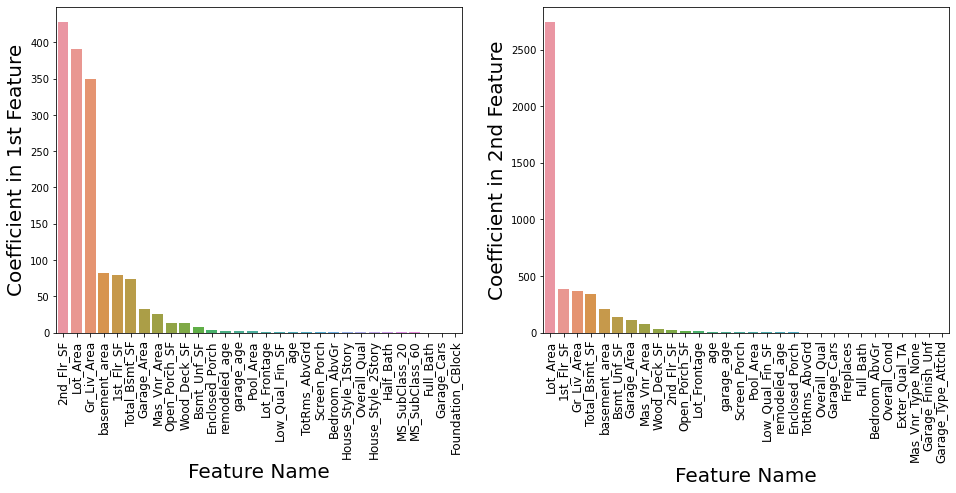

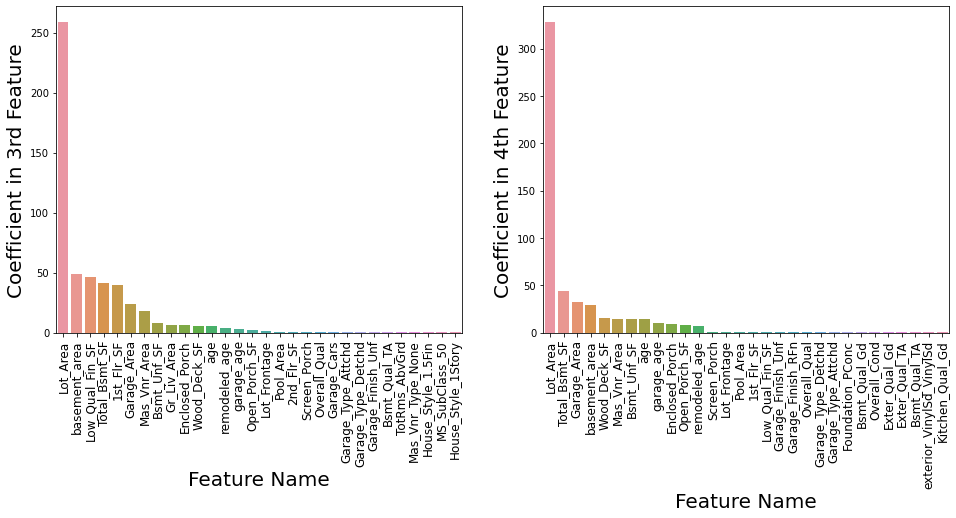

In [114]:
fig, axis = plt.subplots(1,2,figsize=(16,6))

df = pd.DataFrame(data = np.abs(transformer.components_[0,:].T),index=AmesPCADum.columns).reset_index().\
                 sort_values(by=0,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x = 'index', y = 0, ax = axis[0])

axis[0].set_xlabel('Feature Name',fontsize=20)
axis[0].set_ylabel('Coefficient in 1st Feature',fontsize=20)
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 90, size=12)
#******************************************************************************************************************
df = pd.DataFrame(data = np.abs(transformer.components_[1,:].T),index=AmesPCADum.columns).reset_index().\
                  sort_values(by=0,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x = 'index', y = 0, ax = axis[1])

axis[1].set_xlabel('Feature Name',fontsize=20)
axis[1].set_ylabel('Coefficient in 2nd Feature',fontsize=20)
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 90, size=12)

fig, axis = plt.subplots(1,2,figsize=(16,6))
#******************************************************************************************************************
df = pd.DataFrame(data = np.abs(transformer.components_[2,:].T),index=AmesPCADum.columns).reset_index().\
                  sort_values(by=0,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x = 'index', y = 0, ax = axis[0])

axis[0].set_xlabel('Feature Name',fontsize=20)
axis[0].set_ylabel('Coefficient in 3rd Feature',fontsize=20)
axis[0].set_xticklabels(axis[0].get_xticklabels(),rotation = 90, size=12)
#******************************************************************************************************************
df = pd.DataFrame(data = np.abs(transformer.components_[3,:].T),index=AmesPCADum.columns).reset_index().\
                  sort_values(by=0,ascending=False).iloc[:30,:]
av = sns.barplot(data = df , x = 'index', y = 0, ax = axis[1])

axis[1].set_xlabel('Feature Name',fontsize=20)
axis[1].set_ylabel('Coefficient in 4th Feature',fontsize=20)
axis[1].set_xticklabels(axis[1].get_xticklabels(),rotation = 90, size=12);

In [115]:
from sklearn.decomposition import TruncatedSVD

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
sc = StandardScaler()
AmesPCADum_scaled = sc.fit_transform(AmesPCADum)

In [118]:
svd = TruncatedSVD(n_components = 16, algorithm = 'randomized', random_state = 144)
AmesPCADum_svd = svd.fit_transform(AmesPCADum_scaled)
pd.DataFrame(data = AmesPCADum_svd, columns = ['feature_'+str(i) for i in range(16)]).to_csv('TruncatedSVDData.csv')
AmesPCADum_svd.shape

(2930, 16)

In [119]:
transformer.components_.shape

(80, 254)

In [120]:
from sklearn.decomposition import KernelPCA

In [121]:
kpca = KernelPCA(n_components = 20, kernel='rbf', gamma=15, random_state=144)
AmesPCADum_kpca = kpca.fit_transform(AmesPCADum)
pd.DataFrame(data = AmesPCADum_kpca).to_csv('KernalPCAData.csv')
AmesPCADum_kpca.shape

(2930, 20)

In [123]:
from sklearn.manifold import TSNE

In [124]:
tsne = TSNE(n_components = 3, random_state = 144)
AmesPCADum_tsne = tsne.fit_transform(AmesPCADum_scaled)
pd.DataFrame(data = AmesPCADum_tsne).to_csv('tSNEData.csv')
AmesPCADum_tsne.shape

(2930, 3)

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components = 25, metric=True, random_state = 144)
AmesPCADum_mds = mds.fit_transform(AmesPCADum)
pd.DataFrame(data = AmesPCADum_mds).to_csv('MDSData.csv')
AmesPCADum_mds.shape

In [ ]:
mds.n_components

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
isomap = Isomap(n_neighbors = 3, n_components = 100,  eigen_solver='auto')
AmesPCADum_isomap = isomap.fit_transform(AmesPCADum)
pd.DataFrame(data = AmesPCADum_isomap).to_csv('ISOData.csv')

In [ ]:
AmesPCADum_isomap.shape

In [ ]:
isomap.embedding_.shape